<a href="https://colab.research.google.com/github/Sayed-Ali-Raza-Naqvi/CodexCue_Spam-Classification_Project/blob/main/CodexCue_Spam_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('/content/spam.csv', encoding='latin1')

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2599,ham,"Gosh that , what a pain. Spose I better come t...",NaN,NaN,NaN
3526,ham,Should i send you naughty pix? :),NaN,NaN,NaN
3679,ham,I cant pick the phone right now. Pls send a me...,NaN,NaN,NaN
4482,ham,True lov n care wil nevr go unrecognized. thou...,NaN,NaN,NaN
3432,ham,Christmas is An occasion that is Celebrated as...,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

## Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [9]:
df.sample(5)

,v1,v2
3220,spam,"Thanks for your ringtone order, reference numb..."
3122,ham,He telling not to tell any one. If so treat fo...
2808,ham,Oh yeah I forgot. U can only take 2 out shoppi...
4853,ham,"Also north carolina and texas atm, you would j..."
2337,ham,Tell your friends what you plan to do on Valen...


In [10]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [11]:
df.sample(5)

,target,text
1899,ham,I love working from home :)
1486,ham,Hello lover! How goes that new job? Are you th...
405,ham,"Haha get used to driving to usf man, I know a ..."
4933,ham,Hey do you want anything to buy:)
3604,ham,Jordan got voted out last nite!


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
df.duplicated().sum()

403

In [17]:
df = df.drop_duplicates(keep='first')

In [18]:
df.shape

(5169, 2)

## EDA

In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [20]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x7ac54d5a8910>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

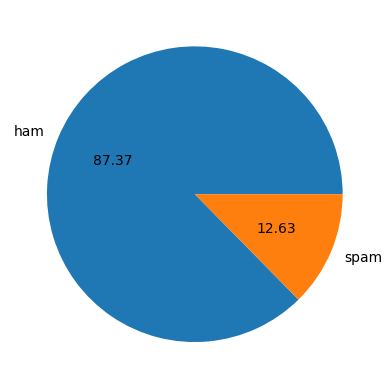

In [21]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
df['number_characters'] = df['text'].apply(len)

In [25]:
df['number_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [26]:
df['number_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,target,text,number_characters,number_words,number_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[['number_characters', 'number_words', 'number_sentences']].describe()

,number_characters,number_words,number_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
df[df['target'] == 0][['number_characters', 'number_words', 'number_sentences']].describe()

,number_characters,number_words,number_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
df[df['target'] == 1][['number_characters', 'number_words', 'number_sentences']].describe()

,number_characters,number_words,number_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [31]:
import seaborn as sns

<Axes: xlabel='number_characters', ylabel='Count'>

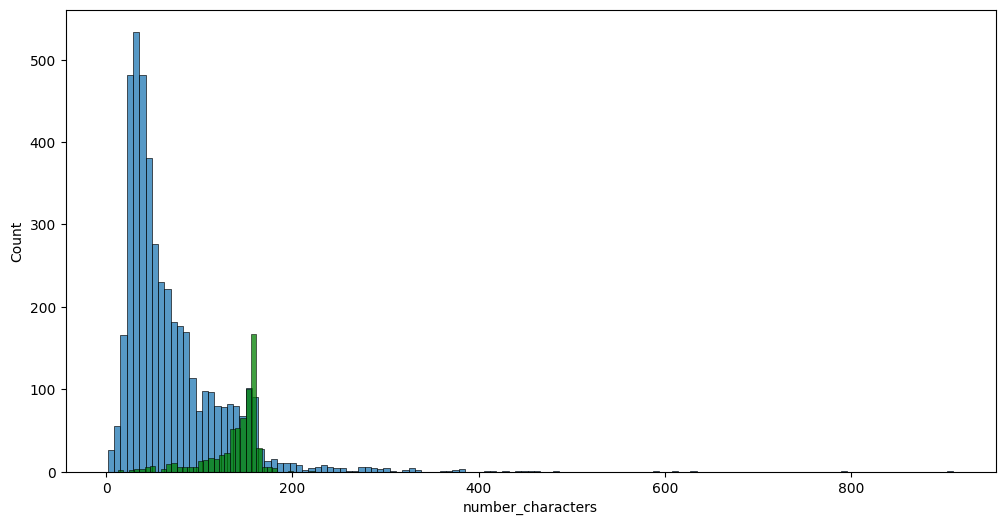

In [32]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['number_characters'])
sns.histplot(df[df['target'] == 1]['number_characters'], color='green')

<Axes: xlabel='number_words', ylabel='Count'>

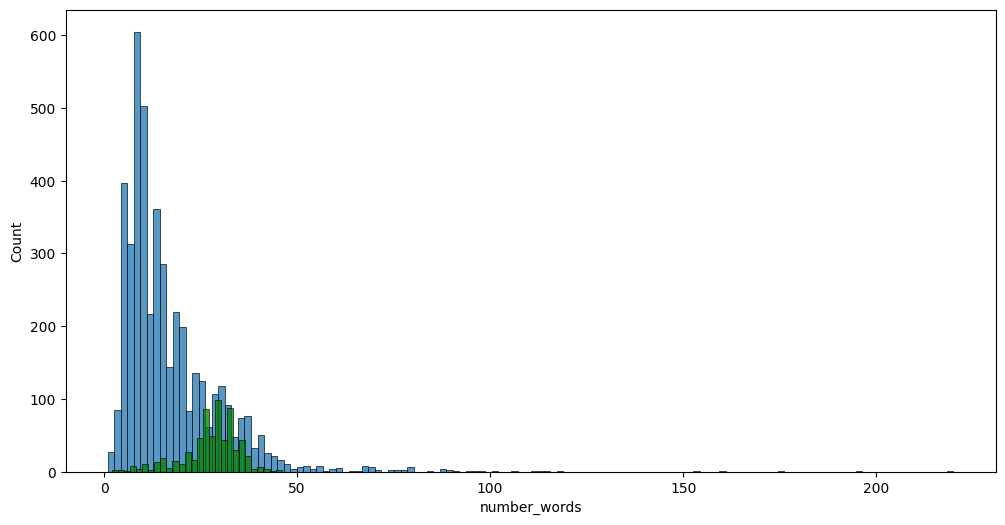

In [33]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['number_words'])
sns.histplot(df[df['target'] == 1]['number_words'], color='green')

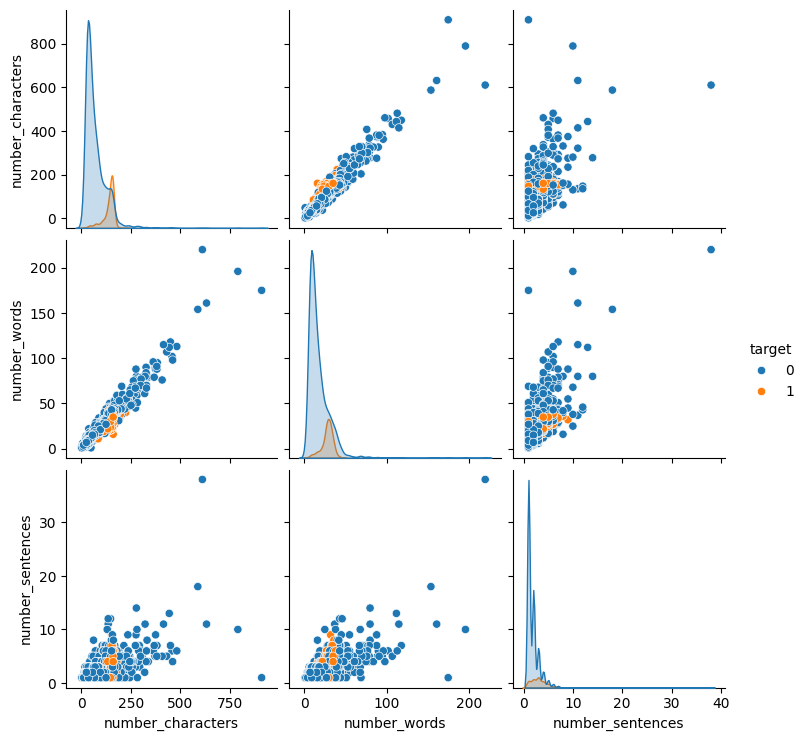

In [34]:
sns.pairplot(df, hue='target')

<Axes: >

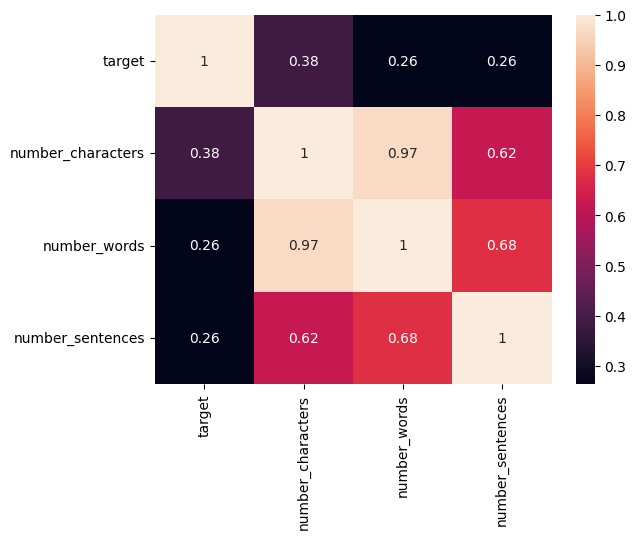

In [35]:
numeric_columns = df[['target', 'number_characters', 'number_words', 'number_sentences']]
sns.heatmap(numeric_columns.corr(), annot=True)

## Text Preprocessing

In [40]:
nltk.download('stopwords')
import string
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
stemmer = PorterStemmer()

In [42]:
def text_transformation(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  new_text = []

  for i in text:
    if i.isalnum():
      new_text.append(i)

  text = new_text[:]
  new_text.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      new_text.append(i)

  text = new_text[:]
  new_text.clear()

  for i in text:
    new_text.append(stemmer.stem(i))

  return ' '.join(new_text)

In [43]:
df['transformed_text'] = df['text'].apply(text_transformation)

In [44]:
df.head()

,target,text,number_characters,number_words,number_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
from wordcloud import WordCloud

In [46]:
word_cloud = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_words = word_cloud.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=' '))

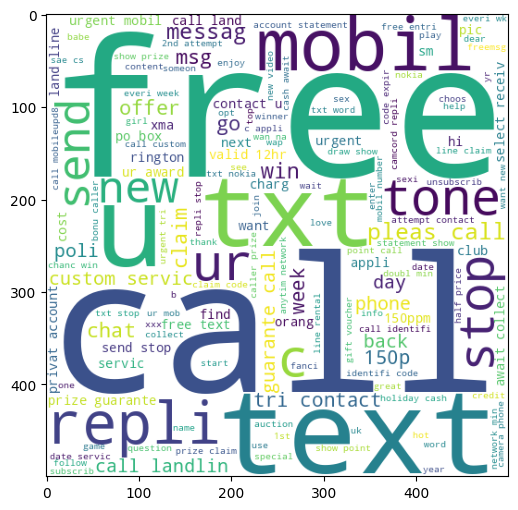

In [47]:
plt.figure(figsize=(12, 6))
plt.imshow(spam_words)

In [48]:
ham_words = word_cloud.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=' '))

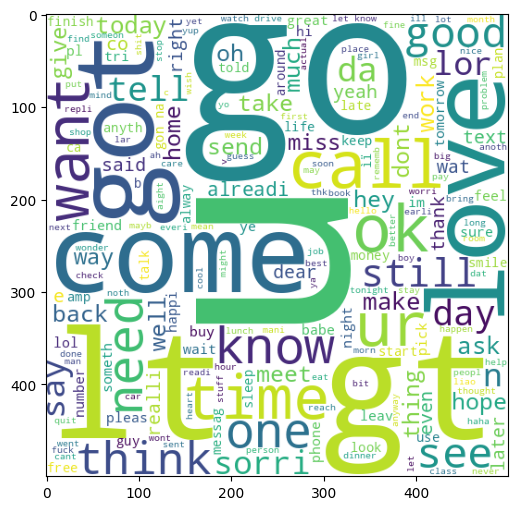

In [49]:
plt.figure(figsize=(12, 6))
plt.imshow(ham_words)

In [50]:
spams = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
  for words in msg.split():
    spams.append(words)

In [51]:
len(spams)


9939

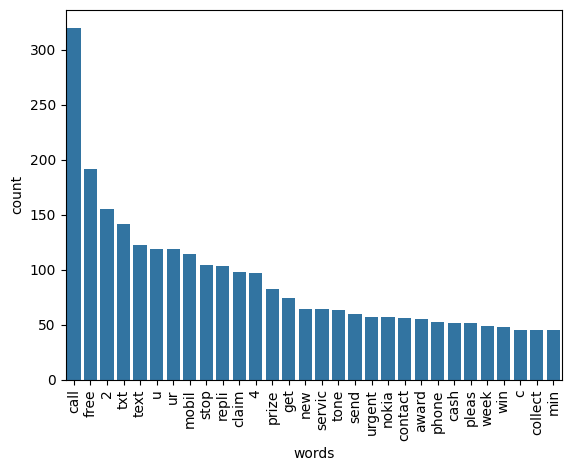

In [52]:
from collections import Counter
most_common_words = pd.DataFrame(Counter(spams).most_common(30), columns=['words', 'count'])
sns.barplot(data=most_common_words, x='words', y='count')
plt.xticks(rotation='vertical')
plt.show()

In [53]:
hams = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
  for words in msg.split():
    hams.append(words)

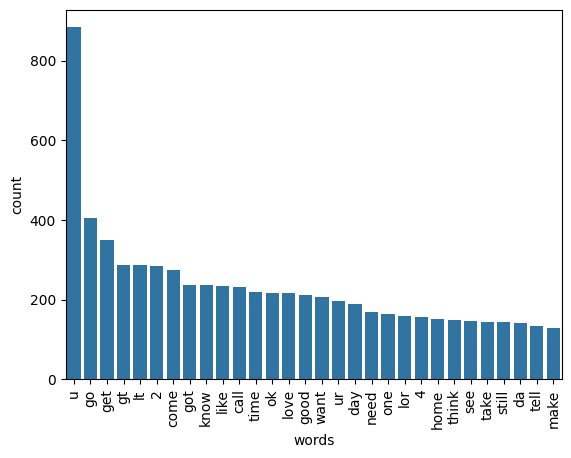

In [54]:
most_common_ham_words = pd.DataFrame(Counter(hams).most_common(30), columns=['words', 'count'])
sns.barplot(data=most_common_ham_words, x='words', y='count')
plt.xticks(rotation='vertical')
plt.show()

## Machine Learning Model

In [55]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
count_vector = CountVectorizer()
tfidf_vector = TfidfVectorizer()

In [56]:
# X = count_vector.fit_transform(df['transformed_text']).toarray()
X = tfidf_vector.fit_transform(df['transformed_text']).toarray()

In [57]:
Y = df['target'].values

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [60]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [61]:
gauss_nb = GaussianNB()
multi_nb = MultinomialNB()
bern_nb = BernoulliNB()

In [62]:
gauss_nb.fit(X_train, Y_train)
gauss_pred = gauss_nb.predict(X_test)
print(accuracy_score(Y_test, gauss_pred))
print()
print(confusion_matrix(Y_test, gauss_pred))
print()
print(precision_score(Y_test, gauss_pred))

0.8636363636363636

[[772 117]
 [ 24 121]]

0.5084033613445378


In [63]:
multi_nb.fit(X_train, Y_train)
multi_pred = multi_nb.predict(X_test)
print(accuracy_score(Y_test, multi_pred))
print()
print(confusion_matrix(Y_test, multi_pred))
print()
print(precision_score(Y_test, multi_pred))

0.9613152804642167

[[888   1]
 [ 39 106]]

0.9906542056074766


In [64]:
bern_nb.fit(X_train, Y_train)
bern_pred = bern_nb.predict(X_test)
print(accuracy_score(Y_test, bern_pred))
print()
print(confusion_matrix(Y_test, bern_pred))
print()
print(precision_score(Y_test, bern_pred))

0.9661508704061895

[[885   4]
 [ 31 114]]

0.9661016949152542


In [65]:
import pickle
pickle.dump(tfidf_vector, open('vectorizer.pkl', 'wb'))
pickle.dump(multi_nb, open('model.pkl', 'wb'))